# Online Food Order Prediction


There has been a high demand for online food orders after the introduction of Swiggy and Zomato in the market. Food delivery companies use your buying habits to make the delivery process faster. The food order prediction system is one of the useful techniques these companies can use to make the entire delivery process fast. In this article, I will take you through the task of Online Food Order Prediction with Machine Learning using Python.

After implementing the complete online food delivery system, companies like Swiggy and Zomato will always try to improve them. The main objective of these companies toward their customers is to deliver the food at the right time. To deliver the food faster, these companies identify areas where the demand for online food orders is high and employ more delivery partners in those locations. It helps deliver food faster in areas with more orders.

These companies have so much data about their customers that they now know the food ordering habits of all customers. With this data, they can also predict whether or not a customer will order again from their app. It is a good technique for identifying areas, families and customer types with more business opportunities.

I hope you now have understood the use case of online food order prediction systems. In the section below, I will take you through how you can train a Machine Learning model to predict online food orders from a particular customer.

Dataset : https://github.com/rahulmuggalla/Online_Food_Order_Prediction/blob/main/onlinefoods.csv

In [34]:
#importing libraries
import numpy as np #2 perform mathematical operations on arrays
import pandas as pd #for data analysis
import seaborn as sns #statistical graphics

from sklearn.ensemble import RandomForestClassifier #handle the missing values& maintain the accuracy of a large proportion of data
from sklearn.model_selection import train_test_split #measure the accuracy of the model 
from sklearn.metrics import accuracy_score #measure model performance
from sklearn.model_selection import cross_val_score #statistical method used to estimate the performance (or accuracy) of machine learning models

Data Collection

In [35]:
#load the dataset 2 pandas data frame for manupulating the data
raw_data = pd.read_csv('onlinefoods.csv', encoding = 'latin-1')

#now v hv 2 replace null values with null string otherwise it will show errors
#v will store this in variable claaed "mail_data"
online_food_dataset = raw_data.where((pd.notnull(raw_data)), '')

#lets check the shape of the dataset
online_food_dataset.shape

(388, 13)

In [36]:
# printing the first 10 rows of the dataset
online_food_dataset.head(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
5,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive,Yes
6,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
7,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
8,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
9,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes


In [37]:
# printing the last 10 rows of the dataset
online_food_dataset.tail(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
378,23,Female,Single,Employee,25001 to 50000,Post Graduate,2,12.9847,77.5491,560100,Yes,Positive,Yes
379,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
380,27,Female,Married,Employee,More than 50000,Post Graduate,2,12.9299,77.6848,560103,Yes,Positive,Yes
381,22,Male,Single,Student,No Income,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
382,24,Female,Single,Student,No Income,Post Graduate,3,12.9828,77.6131,560042,Yes,Positive,Yes
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive,Yes


So the dataset contains information like:

1) the age of the customer

2) marital status of the customer

3) occupation of the customer

4) monthly income of the customer

5) educational qualification of the customer

6) family size of the customer

7) latitude and longitude of the location of the customer

8) pin code of the residence of the customer

9) did the customer order again (Output)

10) Feedback of the last order (Positive or Negative)

In [38]:
#dataset informations
online_food_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


### Counterplot
Showing the total count of Yes and No Outputs in counterplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


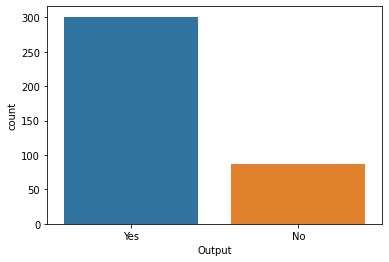

In [39]:
#lets plot the data 
sns.countplot(online_food_dataset['Output'])

In [40]:
#v can c how many examples r there for output yes & no
pd.value_counts(online_food_dataset['Output'])

Yes    301
No      87
Name: Output, dtype: int64

In [41]:
#Now let’s prepare the data for the task of training a machine learning model. 
#Here I will convert all the categorical features into numerical values:
online_food_dataset["Gender"] = online_food_dataset["Gender"].map({"Male": 1, 
                                                                   "Female": 0})

online_food_dataset["Marital Status"] = online_food_dataset["Marital Status"].map({"Married": 2, 
                                                                                   "Single": 1, 
                                                                                   "Prefer not to say": 0})

online_food_dataset["Occupation"] = online_food_dataset["Occupation"].map({"Student": 1, 
                                                                           "Employee": 2, 
                                                                           "Self Employeed": 3, 
                                                                           "House wife": 4})

online_food_dataset["Educational Qualifications"] = online_food_dataset["Educational Qualifications"].map({"Graduate": 1, 
                                                                                                           "Post Graduate": 2, 
                                                                                                           "Ph.D": 3, "School": 4, 
                                                                                                           "Uneducated": 5})

online_food_dataset["Monthly Income"] = online_food_dataset["Monthly Income"].map({"No Income": 0, 
                                                                                   "25001 to 50000": 5000, 
                                                                                   "More than 50000": 7000, 
                                                                                   "10001 to 25000": 25000, 
                                                                                   "Below Rs.10000": 10000})

online_food_dataset["Feedback"] = online_food_dataset["Feedback"].map({"Positive": 1, 
                                                                       "Negative ": 0})

online_food_dataset["Output"] = online_food_dataset["Output"].map({"Yes": 1, 
                                                                   "No": 0})

In [42]:
# printing the first 10 rows of the dataset
online_food_dataset.head(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,1,1,0,2,4,12.9766,77.5993,560001,1,1,Yes
1,24,0,1,1,10000,1,3,12.9770,77.5773,560009,1,1,Yes
2,22,1,1,1,10000,2,3,12.9551,77.6593,560017,1,0,Yes
3,22,0,1,1,0,1,6,12.9473,77.5616,560019,1,1,Yes
4,22,1,1,1,10000,2,4,12.9850,77.5533,560010,1,1,Yes
5,27,0,2,2,7000,2,2,12.9299,77.6848,560103,1,1,Yes
6,22,1,1,1,0,1,3,12.9770,77.5773,560009,1,1,Yes
7,24,0,1,1,0,2,3,12.9828,77.6131,560042,1,1,Yes
8,23,0,1,1,0,2,2,12.9766,77.5993,560001,1,1,Yes
9,23,0,1,1,0,2,4,12.9854,77.7081,560048,1,1,Yes


In [43]:
# printing the last 10 rows of the dataset
online_food_dataset.tail(10)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
378,23,0,1,2,5000,2,2,12.9847,77.5491,560100,1,1,Yes
379,22,1,1,1,10000,2,4,12.9850,77.5533,560010,1,1,Yes
380,27,0,2,2,7000,2,2,12.9299,77.6848,560103,1,1,Yes
381,22,1,1,1,0,1,3,12.9770,77.5773,560009,1,1,Yes
382,24,0,1,1,0,2,3,12.9828,77.6131,560042,1,1,Yes
383,23,0,1,1,0,2,2,12.9766,77.5993,560001,1,1,Yes
384,23,0,1,1,0,2,4,12.9854,77.7081,560048,1,1,Yes
385,22,0,1,1,0,2,5,12.9850,77.5533,560010,1,1,Yes
386,23,1,1,1,10000,2,2,12.9770,77.5773,560009,1,1,Yes
387,23,1,1,1,0,2,5,12.8988,77.5764,560078,1,1,Yes


## Data Preprocessing

Splitting the data into Features & Targets

In [44]:
#assigning features as X
#v r gonna drop the latitude, longitude, output & unnamed: 12 column's
#as v r droping the column v need 2 mention axis = 1
X = online_food_dataset.drop(columns = ['latitude', 'longitude', 'Output', 'Unnamed: 12'], axis = 1)

#assigning targets as Y
Y = online_food_dataset['Output']

In [45]:
print(X) #printing the features
print("---------------------------------------------------------------------------------------------------------------------------")
print(Y) #printing the targets

     Age  Gender  Marital Status  Occupation  Monthly Income  \
0     20       0               1           1               0   
1     24       0               1           1           10000   
2     22       1               1           1           10000   
3     22       0               1           1               0   
4     22       1               1           1           10000   
..   ...     ...             ...         ...             ...   
383   23       0               1           1               0   
384   23       0               1           1               0   
385   22       0               1           1               0   
386   23       1               1           1           10000   
387   23       1               1           1               0   

     Educational Qualifications  Family size  Pin code  Feedback  
0                             2            4    560001         1  
1                             1            3    560009         1  
2                             

## Dividing data into train and test data using sklearn's train_test_split()

In [46]:
#spliting the dataset in2 Training & Testing

#test size --> 2 specify the percentage of test data needed ==> 0.2 ==> 20%

#random state --> specific split of data each value of random_state splits the data differently, v can put any state v want
#v need 2 specify the same random_state everytym if v want 2 split the data the same way everytym
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

In [47]:
#checking dimensions of Features
print(X.shape, X_train.shape, X_test.shape)

(388, 9) (349, 9) (39, 9)


In [48]:
#checking dimensions of Targets
print(Y.shape, Y_train.shape, Y_test.shape)

(388,) (349,) (39,)


## Our data is ready to be applied a machine learning algorithm

Model Training:

# Random Forest Classifier

In [49]:
#loading the Random Forest Classifier 2 the variable "model"
#training the Random Forest Classifier Model with Training Data
#v r fitting the data x_train, y_train 2 the model which is the Random Forest Classifier model, so the model is trained with the data
model = RandomForestClassifier().fit(X_train, Y_train)

## **Evaluation of the model**

## Predicting seen data with our RandomForestClassifier ML model

In [50]:
#prediction on train_data
X_train_prediction = model.predict(X_train)
X_train_prediction

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,

## Predicting unseen data with our RandomForestClassifier ML model

In [51]:
#prediction on test_data
X_test_prediction = model.predict(X_test)
X_test_prediction

array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

## Checking Accuracy of RandomForestClassifier ML model with training data and testing data

In [52]:
#v r finding the accuracy_score on the training data 2 check how the model performs on traing data 
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

#v r finding the accuracy_score on the testing data 2 check how the model performs on testing data 
#prediction on train_data
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [53]:
#print the accuracy_score on training data
print('Accuracy on Training data : ', training_data_accuracy)

#print the accuracy_score on testing data
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  1.0
Accuracy score on Test Data :  0.9230769230769231


## RandomForestClassifier ML model Score

In [54]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the training data 
model.score(X_train, Y_train)

1.0

In [55]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the test data 
model.score(X_test, Y_test)

0.9230769230769231

## Lets Cross Validate and Check how the model performs.

In [56]:
#cross validation
#it is used to protect against overfitting in a predictive model, 
#particularly in a case where the amount of data may be limited. In cross-validation, 
#you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.
#cv = 5 ==> partition the data in2 4 Training & 1 Testing Data parts
print(cross_val_score(model, X, Y, cv = 5))

[0.75641026 0.87179487 0.8974359  0.90909091 0.94805195]


## Building a Predictive System

In [59]:
print("Enter Customer Details to Predict If the Customer Will Order Again")

a = int(input("Enter the Age of the Customer : "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female) : "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed) : "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4) : "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5) : "))
g = int(input("Family Size : "))
h = int(input("Pin Code : "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative) : "))

features = np.array([[a, b, c, d, e, f, g, h, i]])

prediction = model.predict(features)
print(prediction)

if (prediction[0]==1):
  print('Yes, the person will order food again :)')
else:
  print('No, the person will not order food again :(')

Enter Customer Details to Predict If the Customer Will Order Again
Enter the Age of the Customer : 19
Enter the Gender of the Customer (1 = Male, 0 = Female) : 1
Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed) : 1
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4) : 1
Monthly Income: 5000
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5) : 1
Family Size : 3
Pin Code : 520002
Review of the Last Order (1 = Positive, 0 = Negative) : 0
[1]
Yes, the person will order food again :)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


## Summary
So this is how you can predict whether a customer will order food online again or not. The food order prediction system is one of the useful techniques food delivery companies can use to make the entire delivery process fast.

# Saving the trained model

In [60]:
import pickle #keeps track of the objects it has already serialized ==> allows saving model in very little tym

In [61]:
#save the model trained in the file "trained_model.sav" to a new file called "food_order_trained_model.pkl"
filename = 'food_order_trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [62]:
#loading the saved model
loaded_model = pickle.load(open('food_order_trained_model.sav', 'rb'))

In [ ]:
print("Enter Customer Details to Predict If the Customer Will Order Again")

a = int(input("Enter the Age of the Customer : "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female) : "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed) : "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4) : "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5) : "))
g = int(input("Family Size : "))
h = int(input("Pin Code : "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative) : "))

features = np.array([[a, b, c, d, e, f, g, h, i]])

prediction = model.predict(features)
print(prediction)

if (prediction[0]==1):
  print('Yes, the person will order food again :)')
else:
  print('No, the person will not order food again :(')